# Python Environment for Space Weather Application

## Setting up a Conda Environment

The dependencies of different Python modules can be complicated by all means. For this reason, it can be worthwhile to create a new development environment for each project.

A new virtual environment can be added in the terminal:

<img src="fig01.png" alt="drawing" width="600"/>

First a Conda environment with a new name (e.g. hs_nb_env) is created:

<code>>conda create -n hs_nb_env python=3.7</code>

Then the new created environment is activated in the terminal:

<code>>conda activate hs_nb_env</code>

If not already done, the IPython kernel is installed:

<code>>pip install ipykernel</code>

Finally, the new environment is registered in IPython:

<code>>ipython kernel install --user --name=hs_nb_env</code>

Now the environment should be ready in IPython to create new notebooks:

<img src="fig02.png" alt="drawing" width="600"/>

## Python modules - Basics

There is a collection of modules that are also used in other research and application areas and are standard equipment of Python environments. This includes among others:

- [NumPy](https://numpy.org/)
- [SciPy](https://scipy.org/)
- [Matplotlib](https://matplotlib.org/)

More powerful data manipulation is provided by:

- [pandas](https://pandas.pydata.org/)
- [xarray](https://xarray.pydata.org/en/stable/)


The installation of these modules should work easily in Python and Conda:

<code>>pip install numpy scipy matplotlib pandas xarray netcdf4<code>

## Python modules - Plotting maps

The presentation of geo-data (e.g. with applied projections) is also supported by some modules and is needed when, for example, the spatial impact of space weather is investigated. Generally, the following module provided all the tools needed:

- [Basemap](https://matplotlib.org/basemap/index.html)


The installation with Conda is simple:

<code>>conda install -c anaconda basemap</code>

<font color='orange'>Why is the Conda installer used here?</font>

In my experience: Some modules have defined dependencies to certain versions of other modules or need external libraries. Conda does this work while Python and pip require solving these dependencies manually.

For this reason, I would recommend using Conda in case that more than the basic modules are used.

## Python modules - Advanced

For specific questions about working with data or algorithms that deal with space and space weather, a number of other modules can provide useful tools:

- [Astropy](https://www.astropy.org/)
- [SpacePy](https://spacepy.github.io/)
- [SunPy](https://sunpy.org/)

Some modules also offer additonal plotting tools:

- [seaborn](https://seaborn.pydata.org/)

Tools for machine learning algorithms are provided, for example, by the following module:

- [scikit-learn](https://scikit-learn.org/stable/)

<font color='orange'>
These modules won't be needed for the exercises, but I recommend getting familiar with them as well, because they can help considerably with more complex development and research tasks.
</font>

<font color='orange'>
My recommendation: Whenever possible, datasets should be stored in pandas DataFrames, as it is more concise and shortens many procedures. In addition, numPy and sciPy functions can be applied to DataFrames.
</font>

Let's try to read some data with xarray next:

In [2]:
import xarray

mystery_data = xarray.open_dataset('mystery_data.nc')
print(mystery_data)

<xarray.Dataset>
Dimensions:    (time: 73, latitude: 71, longitude: 73)
Coordinates:
  * time       (time) datetime64[ns] 2011-06-01 ... 2011-06-04
  * latitude   (latitude) float64 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5
  * longitude  (longitude) float64 -180.0 -175.0 -170.0 ... 170.0 175.0 180.0
Data variables:
    TEC        (time, latitude, longitude) float64 ...


**What does the file contain?**

- 3-dimensional data with time, latitude and longitude &#8594; set of maps!
- [TEC data](https://impc.dlr.de/products/total-electron-content/forecast-tec/one-hour-forecast-tec-map-global) ... ???

So let's select a map for a chosen time step and put it into a DataFrame:

In [3]:
selected_data = mystery_data.sel(time=mystery_data['time'][14])

tec_map = selected_data.to_dataframe()
print(tec_map)

                                  time   TEC
latitude longitude                          
 87.5    -180.0    2011-06-01 14:00:00  15.3
         -175.0    2011-06-01 14:00:00  15.3
         -170.0    2011-06-01 14:00:00  15.2
         -165.0    2011-06-01 14:00:00  15.2
         -160.0    2011-06-01 14:00:00  15.3
...                                ...   ...
-87.5     160.0    2011-06-01 14:00:00   4.9
          165.0    2011-06-01 14:00:00   4.3
          170.0    2011-06-01 14:00:00   3.6
          175.0    2011-06-01 14:00:00   3.9
          180.0    2011-06-01 14:00:00   4.4

[5183 rows x 2 columns]


DataFrames are 2-dimensional objects, but multi-indexes are used for n-dimensional data. However, since time is not relevant, the required data can be selected. The extracted map is retrieved by applying ``unstack()`` to remove the multi-index:

In [4]:
tec = tec_map['TEC'].unstack()
print(tec.head())

longitude  -180.0  -175.0  -170.0  -165.0  -160.0  -155.0  -150.0  -145.0  \
latitude                                                                    
87.5         15.3    15.3    15.2    15.2    15.3    15.9    16.0    15.6   
85.0         15.0    14.8    14.6    14.5    14.7    15.0    15.0    14.8   
82.5         14.6    14.4    14.1    14.0    14.4    14.4    14.5    14.4   
80.0         14.4    14.4    13.9    13.9    13.5    13.5    13.6    13.6   
77.5         14.0    13.7    13.3    13.3    12.7    12.8    12.8    12.2   

longitude  -140.0  -135.0  ...   135.0   140.0   145.0   150.0   155.0  \
latitude                   ...                                           
87.5         15.4    15.2  ...    14.6    14.6    14.5    14.3    14.4   
85.0         14.7    15.0  ...    15.2    15.2    15.2    14.9    14.7   
82.5         14.1    13.6  ...    15.7    15.0    14.9    14.3    14.5   
80.0         13.4    13.0  ...    14.6    14.0    14.1    14.0    15.0   
77.5         12.

A simple plot of the data:

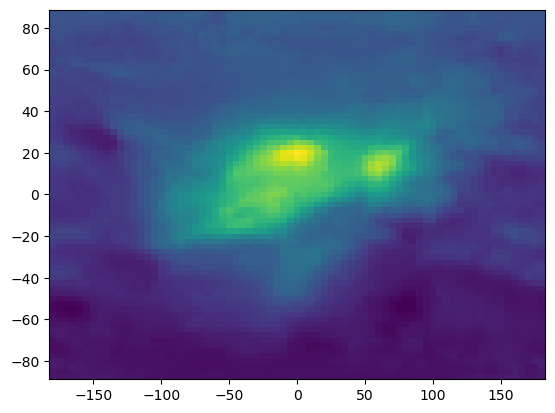

In [5]:
from matplotlib import pyplot

pyplot.pcolormesh(tec.columns, tec.index, tec, shading='auto')
pyplot.show()

The very simple plot can be enhanced with Basemap:

/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_40925/2669194658.py:12: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mesh = map_frame.pcolor(LON, LAT, tec.values, cmap='Spectral_r', vmin=0, vmax=100)


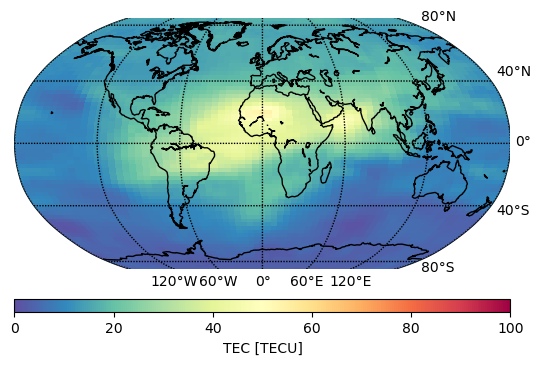

In [7]:
import numpy
import os
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; # ugly fix in case PROJ_LIB is not found

from mpl_toolkits.basemap import Basemap

map_frame = Basemap(projection='robin', lon_0=0)
map_frame.drawcoastlines()

lon, lat = numpy.meshgrid(tec.columns, tec.index)
LON, LAT = map_frame(lon, lat)
mesh = map_frame.pcolor(LON, LAT, tec.values, cmap='Spectral_r', vmin=0, vmax=100)

parallels = numpy.arange(-80, 81, 40.)
meridians = numpy.arange(-180, 180, 60.)
map_frame.drawparallels(parallels, labels=[False, True, False, False])
map_frame.drawmeridians(meridians, labels=[False, False, False, True])

map_frame.colorbar(mesh, pad=.3, location='bottom', label='TEC [TECU]')

pyplot.show()

/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_1055/2001345755.py:6: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mesh = map_frame.pcolor(LON, LAT, tec.values, cmap='Spectral_r', vmin=0, vmax=100)


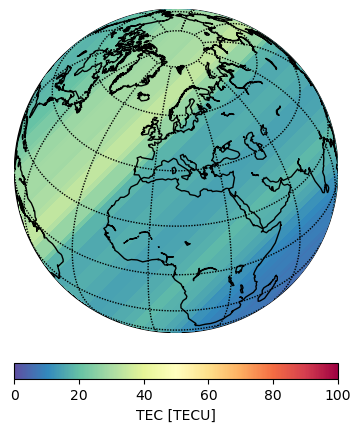

In [ ]:
map_frame = Basemap(projection='ortho',lat_0=40,lon_0=10)
map_frame.drawcoastlines()

lon, lat = numpy.meshgrid(tec.columns, tec.index)
LON, LAT = map_frame(lon, lat)
mesh = map_frame.pcolor(LON, LAT, tec.values, cmap='Spectral_r', vmin=0, vmax=100)

parallels = numpy.arange(-80, 81, 20.)
meridians = numpy.arange(-180, 181., 30.)
# labels = [left,right,top,bottom]
map_frame.drawparallels(parallels)
map_frame.drawmeridians(meridians)

map_frame.colorbar(mesh, pad=.3, location='bottom', label='TEC [TECU]')

pyplot.show()

A commonly used parameter is the global TEC (GTEC), which describes the state of the entire ionosphere. This value is calculated as the average over all grid points:

$\text{GTEC} = \frac{1}{|\Phi| \cdot |\Lambda|} \sum_{i=1}^{|\Phi|}\sum_{j=1}^{|\Lambda|}\text{TEC}_{i,j}$

Create two plot that shows the time variation of GTEC with and without the associated intervals for the standard deviation. For this purpose, the file must be read again and the data set must be aggregated. This can be done with pandas or xarray.

ConversionError: Failed to convert value(s) to axis units: array(['2011-06-01T00:00:00.000000000', '2011-06-01T01:00:00.000000000',
       '2011-06-01T02:00:00.000000000', '2011-06-01T03:00:00.000000000',
       '2011-06-01T04:00:00.000000000', '2011-06-01T05:00:00.000000000',
       '2011-06-01T06:00:00.000000000', '2011-06-01T07:00:00.000000000',
       '2011-06-01T08:00:00.000000000', '2011-06-01T09:00:00.000000000',
       '2011-06-01T10:00:00.000000000', '2011-06-01T11:00:00.000000000',
       '2011-06-01T12:00:00.000000000', '2011-06-01T13:00:00.000000000',
       '2011-06-01T14:00:00.000000000', '2011-06-01T15:00:00.000000000',
       '2011-06-01T16:00:00.000000000', '2011-06-01T17:00:00.000000000',
       '2011-06-01T18:00:00.000000000', '2011-06-01T19:00:00.000000000',
       '2011-06-01T20:00:00.000000000', '2011-06-01T21:00:00.000000000',
       '2011-06-01T22:00:00.000000000', '2011-06-01T23:00:00.000000000',
       '2011-06-02T00:00:00.000000000', '2011-06-02T01:00:00.000000000',
       '2011-06-02T02:00:00.000000000', '2011-06-02T03:00:00.000000000',
       '2011-06-02T04:00:00.000000000', '2011-06-02T05:00:00.000000000',
       '2011-06-02T06:00:00.000000000', '2011-06-02T07:00:00.000000000',
       '2011-06-02T08:00:00.000000000', '2011-06-02T09:00:00.000000000',
       '2011-06-02T10:00:00.000000000', '2011-06-02T11:00:00.000000000',
       '2011-06-02T12:00:00.000000000', '2011-06-02T13:00:00.000000000',
       '2011-06-02T14:00:00.000000000', '2011-06-02T15:00:00.000000000',
       '2011-06-02T16:00:00.000000000', '2011-06-02T17:00:00.000000000',
       '2011-06-02T18:00:00.000000000', '2011-06-02T19:00:00.000000000',
       '2011-06-02T20:00:00.000000000', '2011-06-02T21:00:00.000000000',
       '2011-06-02T22:00:00.000000000', '2011-06-02T23:00:00.000000000',
       '2011-06-03T00:00:00.000000000', '2011-06-03T01:00:00.000000000',
       '2011-06-03T02:00:00.000000000', '2011-06-03T03:00:00.000000000',
       '2011-06-03T04:00:00.000000000', '2011-06-03T05:00:00.000000000',
       '2011-06-03T06:00:00.000000000', '2011-06-03T07:00:00.000000000',
       '2011-06-03T08:00:00.000000000', '2011-06-03T09:00:00.000000000',
       '2011-06-03T10:00:00.000000000', '2011-06-03T11:00:00.000000000',
       '2011-06-03T12:00:00.000000000', '2011-06-03T13:00:00.000000000',
       '2011-06-03T14:00:00.000000000', '2011-06-03T15:00:00.000000000',
       '2011-06-03T16:00:00.000000000', '2011-06-03T17:00:00.000000000',
       '2011-06-03T18:00:00.000000000', '2011-06-03T19:00:00.000000000',
       '2011-06-03T20:00:00.000000000', '2011-06-03T21:00:00.000000000',
       '2011-06-03T22:00:00.000000000', '2011-06-03T23:00:00.000000000',
       '2011-06-04T00:00:00.000000000'], dtype='datetime64[ns]')

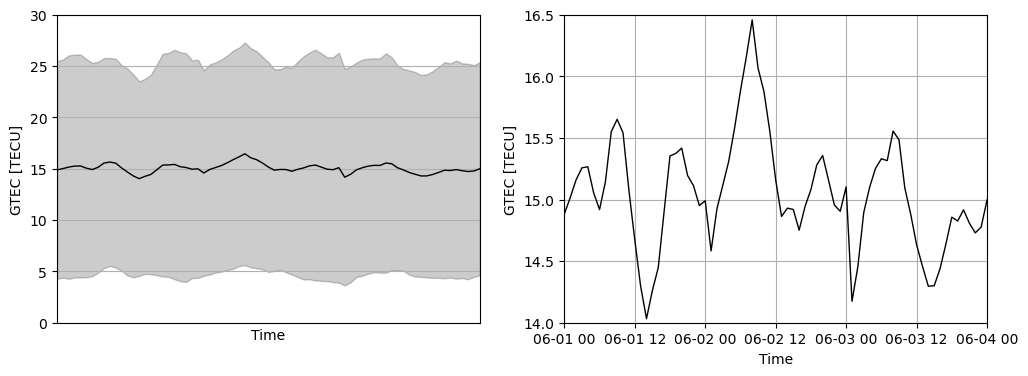

In [8]:
mystery_data = xarray.open_dataset('mystery_data.nc')


gtec = mystery_data.mean(dim=['latitude', 'longitude'])
sigma2 = mystery_data.std(dim=['latitude', 'longitude'])

mystery_data.close()

time_index, gtec_values = gtec['time'].values, gtec['TEC'].values
sigma2_values = sigma2['TEC'].values

fig, (ax1, ax2) = pyplot.subplots(1,2, figsize=[12, 4])

ax1.plot(time_index, gtec_values, 'k-', linewidth=1)
ax1.fill_between(time_index, gtec_values - sigma2_values, gtec_values + sigma2_values, color='k', alpha=.2)
ax1.set_xlabel('Time')
ax1.set_ylabel('GTEC [TECU]')
ax1.set_xlim([time_index[0], time_index[-1]])
ax1.set_ylim([0, 30])
ax1.grid()

ax2.plot(time_index, gtec_values, 'k-', linewidth=1)
ax2.set_xlabel('Time')
ax2.set_ylabel('GTEC [TECU]')
ax2.set_xlim([time_index[0], time_index[-1]])
ax2.set_ylim([14, 16.5])
ax2.grid()

ax1.axvline('2011-06-02 08:00', linestyle=':', color='r')
ax2.axvline('2011-06-02 08:00', linestyle=':', color='r')

ax1.axvline('2011-06-03 08:00', linestyle=':', color='b')
ax2.axvline('2011-06-03 08:00', linestyle=':', color='b')

pyplot.show()


A significant difference of GTEC is observed during 2011-06-02 08:00 (red dotted line) compared to the 2011-06-03 08:00 (blue dotted line). Below is the difference map and the relative difference map between the two time steps.

Optional: Use Basemap to apply a projection and to draw map.

/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_1055/3091012455.py:19: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mesh = map_frame.pcolor(LON, LAT, data_map.values, cmap='Spectral_r', vmin=vmin, vmax=vmax)
/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_1055/3091012455.py:19: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mesh = map_frame.pcolor(LON, LAT, data_map.values, cmap='Spectral_r', vmin=vmin, vmax=vmax)


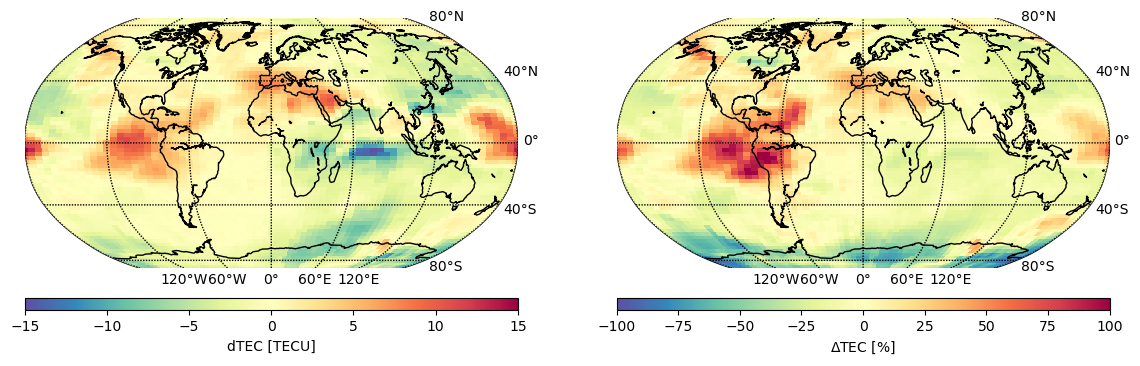

In [ ]:
mystery_data = xarray.open_dataset('mystery_data.nc')

gtec_high = mystery_data.sel(time='2011-06-02 08:00').to_dataframe()['TEC'].unstack()
gtec_low = mystery_data.sel(time='2011-06-03 08:00').to_dataframe()['TEC'].unstack()

difference = gtec_low - gtec_high
relative_difference = difference / gtec_high * 100

mystery_data.close()

fig, (ax1, ax2) = pyplot.subplots(1,2, figsize=[14, 4])

def plot_map(ax, data_map, vmin, vmax, label):
    map_frame = Basemap(ax=ax, projection='robin',lon_0=0)
    map_frame.drawcoastlines()

    lon, lat = numpy.meshgrid(data_map.columns, data_map.index)
    LON, LAT = map_frame(lon, lat)
    mesh = map_frame.pcolor(LON, LAT, data_map.values, cmap='Spectral_r', vmin=vmin, vmax=vmax)

    parallels = numpy.arange(-80, 81, 40.)
    meridians = numpy.arange(-180, 181., 60.)
    # labels = [left,right,top,bottom]
    map_frame.drawparallels(parallels,labels=[False,True,True,False])
    map_frame.drawmeridians(meridians,labels=[True,False,False,True])

    map_frame.colorbar(mesh, pad=.3, location='bottom', label=label)


plot_map(ax1, difference, -15, 15, 'dTEC [TECU]')
plot_map(ax2, relative_difference, -100, 100, '$\Delta$TEC [%]')

pyplot.show() 

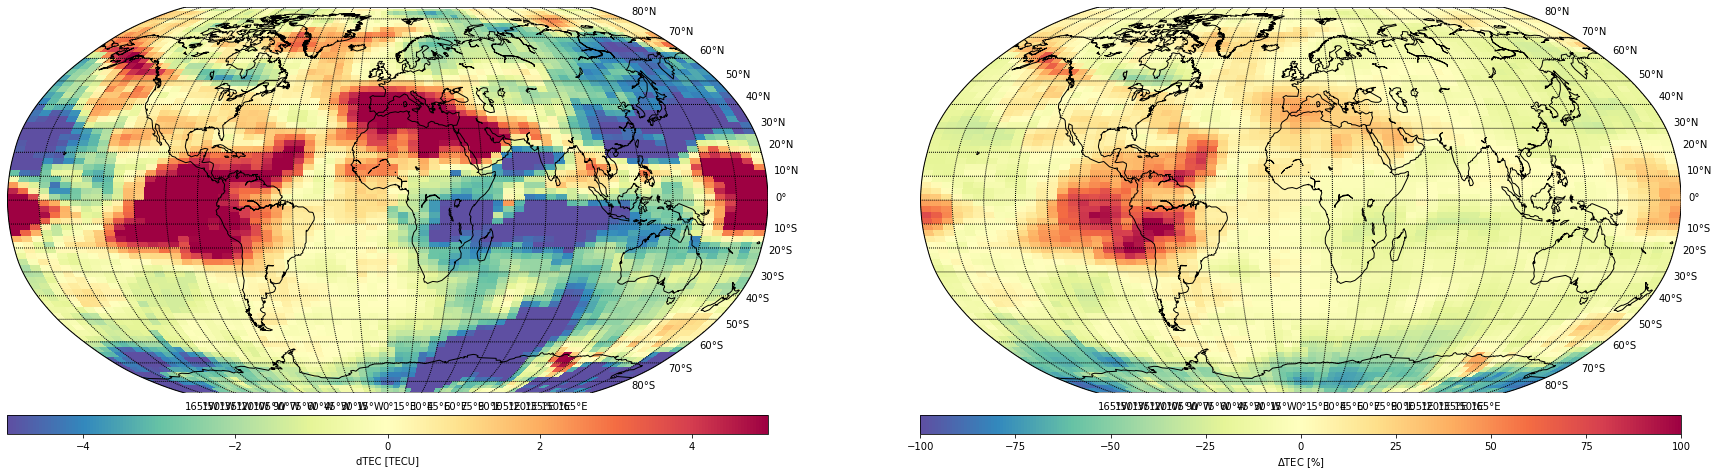

In [ ]:
mystery_data = xarray.open_dataset('mystery_data.nc')

gtec_high = mystery_data.sel(time='2011-06-02 08:00').to_dataframe()['TEC'].unstack()
gtec_low = mystery_data.sel(time='2011-06-03 08:00').to_dataframe()['TEC'].unstack()

difference = gtec_low - gtec_high
relative_difference = difference / gtec_high * 100

mystery_data.close()

fig, (ax1, ax2) = pyplot.subplots(1,2, figsize=[30, 10])

def plot_map(ax, data_map, vmin, vmax, label):
    map_frame = Basemap(ax=ax, projection='robin',lon_0=0)
    map_frame.drawcoastlines()

    lon, lat = numpy.meshgrid(data_map.columns, data_map.index)
    LON, LAT = map_frame(lon, lat)
    mesh = map_frame.pcolor(LON, LAT, data_map.values, cmap='Spectral_r', vmin=vmin, vmax=vmax)

    parallels = numpy.arange(-80, 81, 10.)
    meridians = numpy.arange(-180, 181., 15.)
    # labels = [left,right,top,bottom]
    map_frame.drawparallels(parallels,labels=[False,True,True,False])
    map_frame.drawmeridians(meridians,labels=[True,False,False,True])

    map_frame.colorbar(mesh, pad=.3, location='bottom', label=label)


plot_map(ax1, difference, -5, 5, 'dTEC [TECU]')
plot_map(ax2, relative_difference, -100, 100, '$\Delta$TEC [%]')

pyplot.show()

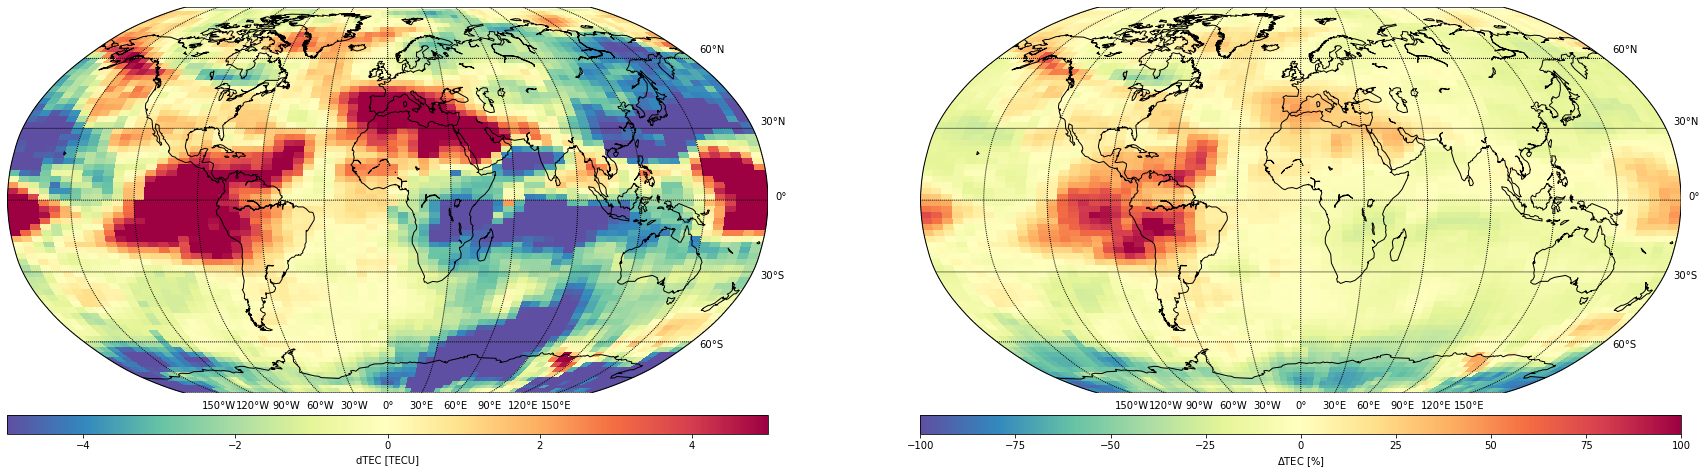

In [ ]:
mystery_data = xarray.open_dataset('mystery_data.nc')

gtec_high = mystery_data.sel(time='2011-06-02 08:00').to_dataframe()['TEC'].unstack()
gtec_low = mystery_data.sel(time='2011-06-03 08:00').to_dataframe()['TEC'].unstack()

difference = gtec_low - gtec_high
relative_difference = difference / gtec_high * 100

mystery_data.close()

fig, (ax1, ax2) = pyplot.subplots(1,2, figsize=[30, 10])

def plot_map(ax, data_map, vmin, vmax, label):
    map_frame = Basemap(ax=ax, projection='robin',lon_0=0)
    map_frame.drawcoastlines()

    lon, lat = numpy.meshgrid(data_map.columns, data_map.index)
    LON, LAT = map_frame(lon, lat)
    mesh = map_frame.pcolor(LON, LAT, data_map.values, cmap='Spectral_r', vmin=vmin, vmax=vmax)

    parallels = numpy.arange(-90, 90, 30.)
    meridians = numpy.arange(-180, 180, 30.)
    # labels = [left,right,top,bottom]
    map_frame.drawparallels(parallels,labels=[False,True,True,False])
    map_frame.drawmeridians(meridians,labels=[True,False,False,True])

    map_frame.colorbar(mesh, pad=.3, location='bottom', label=label)


plot_map(ax1, difference, -5, 5, 'dTEC [TECU]')
plot_map(ax2, relative_difference, -100, 100, '$\Delta$TEC [%]')

pyplot.show()

/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_40925/4175595096.py:20: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mesh = map_frame.pcolor(LON, LAT, data_map.values, cmap='Spectral_r', vmin=vmin, vmax=vmax)
/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_40925/4175595096.py:20: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mesh = map_frame.pcolor(LON, LAT, data_map.values, cmap='Spectral_r', vmin=vmin, vmax=vmax)
/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_40925/4175595096.py:20: UserWarning: The input coordinates to pcolor are interpreted as cell centers, b

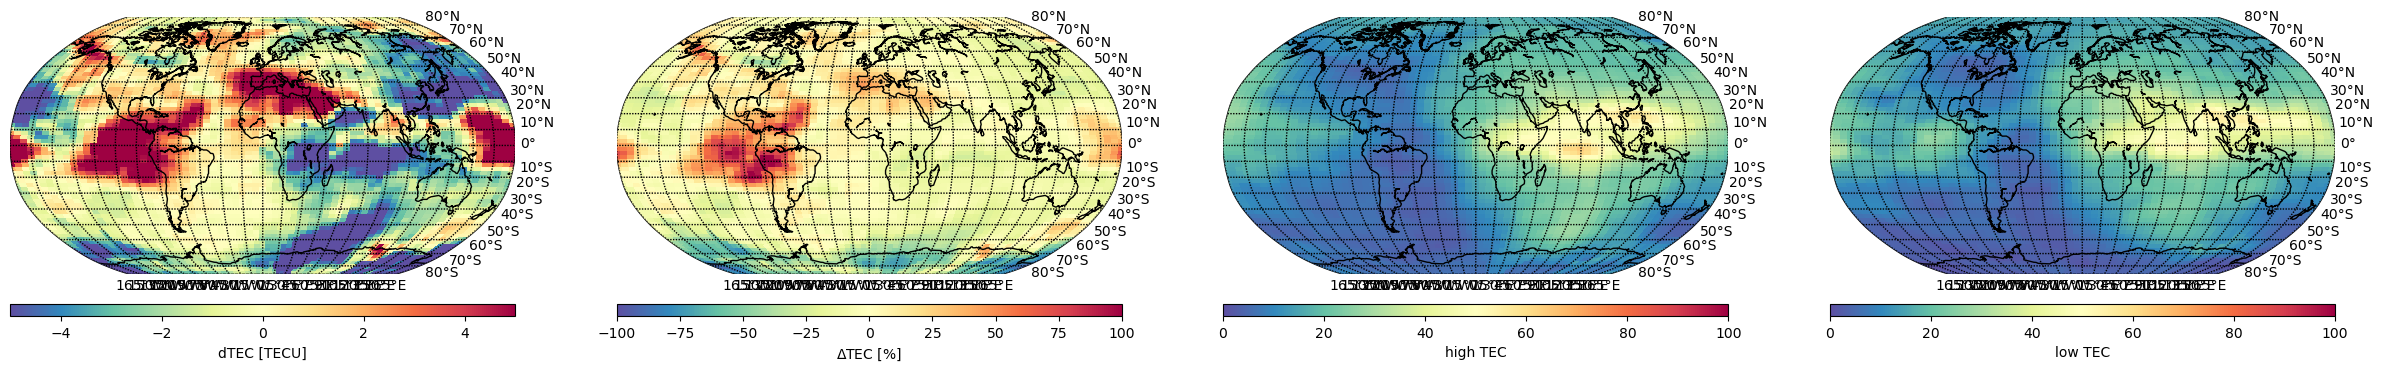

In [9]:
mystery_data = xarray.open_dataset('mystery_data.nc')

gtec_high = mystery_data.sel(time='2011-06-02 08:00').to_dataframe()['TEC'].unstack()
gtec_low = mystery_data.sel(time='2011-06-03 08:00').to_dataframe()['TEC'].unstack()

difference = gtec_low - gtec_high
relative_difference = difference / gtec_high * 100
#print(relative_difference)

mystery_data.close()

fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(1,4, figsize=[30, 10])

def plot_map(ax, data_map, vmin, vmax, label):
    map_frame = Basemap(ax=ax, projection='robin',lon_0=0)
    map_frame.drawcoastlines()

    lon, lat = numpy.meshgrid(data_map.columns, data_map.index)
    LON, LAT = map_frame(lon, lat)
    mesh = map_frame.pcolor(LON, LAT, data_map.values, cmap='Spectral_r', vmin=vmin, vmax=vmax)

    parallels = numpy.arange(-80, 81, 10.)
    meridians = numpy.arange(-180, 181., 15.)
    # labels = [left,right,top,bottom]
    map_frame.drawparallels(parallels,labels=[False,True,True,False])
    map_frame.drawmeridians(meridians,labels=[True,False,False,True])

    map_frame.colorbar(mesh, pad=.3, location='bottom', label=label)


plot_map(ax1, difference, -5, 5, 'dTEC [TECU]')
plot_map(ax2, relative_difference, -100, 100, '$\Delta$TEC [%]')
plot_map(ax3, gtec_high, 0, 100, 'high TEC')
plot_map(ax4, gtec_low, 0, 100, 'low TEC')

pyplot.show()

Plotting the latitude-depdent TEC shows:
- TEC increase in with strong deviations in the Equatorial region
- TEC decrease in in the mid and high latitudes
- TEC decrease in Southern hemisphere is much stronger &#8594; hemispheric assymetry

The observed hemispheric assymetry may be attributed to different sources:
- Seasonal variations (summer in the Northern hemisphere)
- Shape of geomagnetic Equator
- External forces: solar and geomagnetic activity


To analyze the hemispheric asymmetry in more detail, extract the TEC time series for 50°N,0° (NH) as well as 50°S,0° (SH) and try to highlight differences with an appropriate plot.

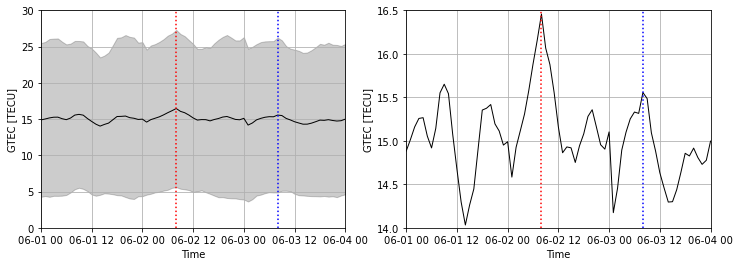

In [ ]:
mystery_data = xarray.open_dataset('mystery_data.nc')

gtec = mystery_data.mean(dim=['latitude', 'longitude'])
sigma2 = mystery_data.std(dim=['latitude', 'longitude'])

mystery_data.close()

time_index, gtec_values = gtec['time'].values, gtec['TEC'].values
sigma2_values = sigma2['TEC'].values

fig, (ax1, ax2) = pyplot.subplots(1,2, figsize=[12, 4])

ax1.plot(time_index, gtec_values, 'k-', linewidth=1)
ax1.fill_between(time_index, gtec_values - sigma2_values, gtec_values + sigma2_values, color='k', alpha=.2)
ax1.set_xlabel('Time')
ax1.set_ylabel('GTEC [TECU]')
ax1.set_xlim([time_index[0], time_index[-1]])
ax1.set_ylim([0, 30])
ax1.grid()

ax2.plot(time_index, gtec_values, 'k-', linewidth=1)
ax2.set_xlabel('Time')
ax2.set_ylabel('GTEC [TECU]')
ax2.set_xlim([time_index[0], time_index[-1]])
ax2.set_ylim([14, 16.5])
ax2.grid()

ax1.axvline('2011-06-02 08:00', linestyle=':', color='r')
ax2.axvline('2011-06-02 08:00', linestyle=':', color='r')

ax1.axvline('2011-06-03 08:00', linestyle=':', color='b')
ax2.axvline('2011-06-03 08:00', linestyle=':', color='b')

pyplot.show()